In [407]:
import pandas as pd

In [408]:
import seaborn as sns

In [409]:
import matplotlib.pyplot as plt

In [410]:
import numpy as np

In [411]:
data = pd.read_csv('top-5000-youtube-channels.csv')

In [412]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [413]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [414]:
data.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

In [415]:
data.shape

(5000, 6)

In [416]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 5000
Number of Columns 6


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [418]:
data.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

<Axes: >

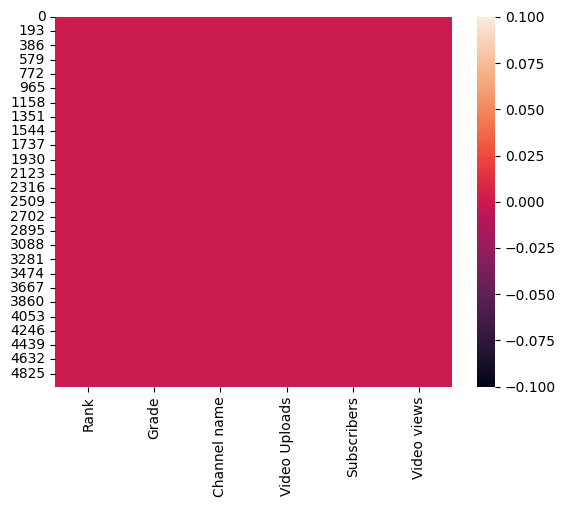

In [419]:
sns.heatmap(data.isnull())

In [420]:
dup_data = data.duplicated().sum()
dup_data

0

In [421]:
data.describe()

,Video views
count,5.000000e+03
mean,1.071449e+09
std,2.003844e+09
min,7.500000e+01
25%,1.862329e+08
50%,4.820548e+08
75%,1.124368e+09
max,4.754884e+10


In [422]:
data.replace('--',np.NaN,regex=True,inplace=True)

In [423]:
# Clean Rank column

In [424]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [425]:
data['Rank'] = data['Rank'].str[0:-2]

In [426]:
data['Rank'] = data['Rank'].str.replace(',','')

In [427]:
data['Rank'].dtypes

dtype('O')

In [428]:
data['Rank'] = data['Rank'].astype(float)

In [429]:
data['Rank'].dtypes

dtype('float64')

In [430]:
# Convert numerical columns to float

In [431]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [432]:
data['Video Uploads'].dtypes

dtype('O')

In [433]:
data['Video Uploads']= data['Video Uploads'].astype(float)

In [434]:
data['Video Uploads'].dtypes

dtype('float64')

In [435]:
data['Subscribers'] = data['Subscribers'].astype(float)

In [436]:
data['Subscribers'].dtypes

dtype('float64')

In [437]:
data['Video views'] = data['Video views'].astype(float)

In [438]:
data['Video views'].dtypes

dtype('float64')

In [439]:
# Clean Grade column

In [440]:
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', '\xa0 ', 'A- ', 'B+ '], dtype=object)

In [441]:
data['Grade'] = data['Grade'].map({'A++ ':5,'A+':4,'A ':3,'A- ':2,'B+ ':1})

In [442]:
data['Grade'].dtypes

dtype('float64')

In [443]:
data.dtypes

Rank             float64
Grade            float64
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views      float64
dtype: object

In [444]:
# 1 Find average subscription for each channel

In [445]:
data['avg_subscription']=data['Subscribers']/data['Video Uploads']

In [446]:
data.head(1)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_subscription
0,1.0,5.0,Zee TV,82757.0,18752951.0,2.086979e+10,226.602596


In [447]:
#2 Find out the last 5 channels with minimum number of views

In [448]:
last_5 = data.sort_values(by='Video views').head()

In [449]:
last_5

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_subscription
2404,2405.0,1.0,ItsHARSH007 Gaming,1.0,23499.0,75.0,23499.000000
326,327.0,3.0,Bollywood Event Talkies,10.0,NaN,350.0,NaN
1294,1295.0,2.0,VideoClipVietNam,5.0,56096.0,8496.0,11219.200000
1350,1351.0,2.0,GumTea TV,14.0,114244.0,9495.0,8160.285714
2972,2973.0,1.0,DICHARA,23.0,48687.0,74014.0,2116.826087


In [450]:
# Visualize

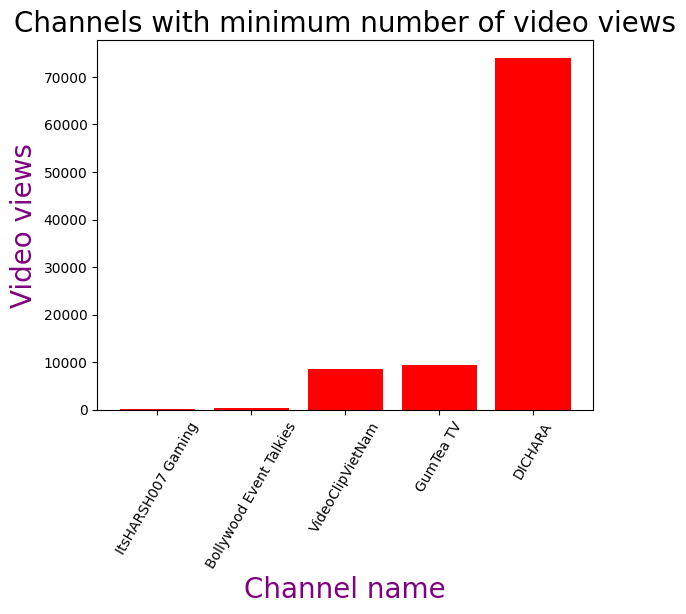

In [451]:
x = last_5['Channel name']
y = last_5['Video views']
plt.xlabel('Channel name',fontsize=20,color='purple')
plt.ylabel('Video views',fontsize=20,color='purple')
plt.title('Channels with minimum number of video views',size=20)
plt.bar(x,y,color='red')
plt.xticks(rotation=60)
plt.show()

In [452]:
# Result: ItsHARSH007 Gaming, Bollywood Event Talkies, VideoClipVietNam, GumTea TV, DICHARA

In [453]:
#3 Which Grade a minimum number of video uploads

In [454]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'avg_subscription'],
      dtype='object')

In [455]:
grade = data.groupby('Grade')['Video Uploads'].sum().sort_values()

In [456]:
grade

Grade
5.0     374507.0
2.0    4235791.0
3.0    5158817.0
1.0    8826581.0
Name: Video Uploads, dtype: float64

In [457]:
# Visualize

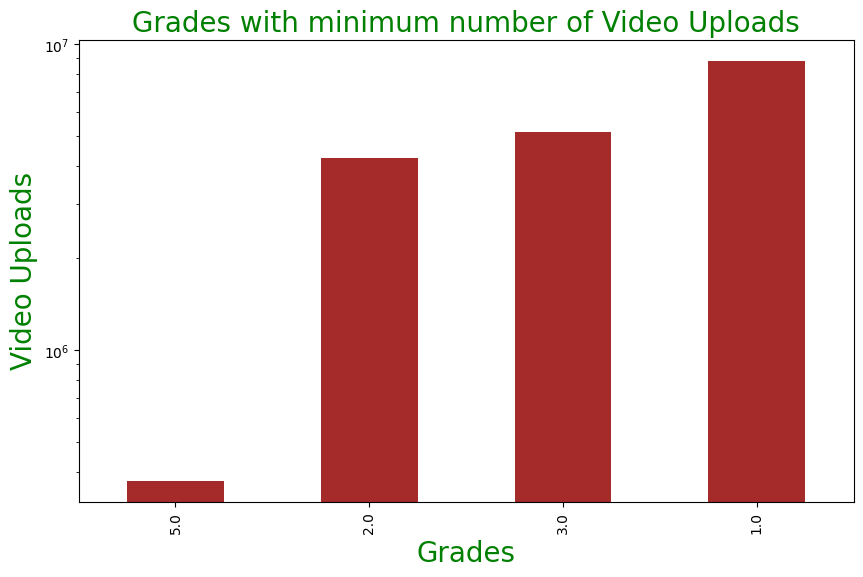

In [458]:
ax = grade.plot(kind='bar',color='brown',logy=True,figsize=(10,6))
plt.xlabel('Grades',fontsize=20,color='green')
plt.ylabel('Video Uploads',fontsize=20,color='green')
plt.title('Grades with minimum number of Video Uploads',size=20,color='green')
plt.show()

In [459]:
# Result: 5.0

In [460]:
#4 Which Grade has the lowest number of subscribers

In [461]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'avg_subscription'],
      dtype='object')

In [462]:
grade_sub = data.groupby('Grade')['Subscribers'].sum().sort_values()

In [463]:
grade_sub

Grade
5.0    2.228176e+08
2.0    2.633408e+09
1.0    4.178836e+09
3.0    4.581101e+09
Name: Subscribers, dtype: float64

In [464]:
# Visualize

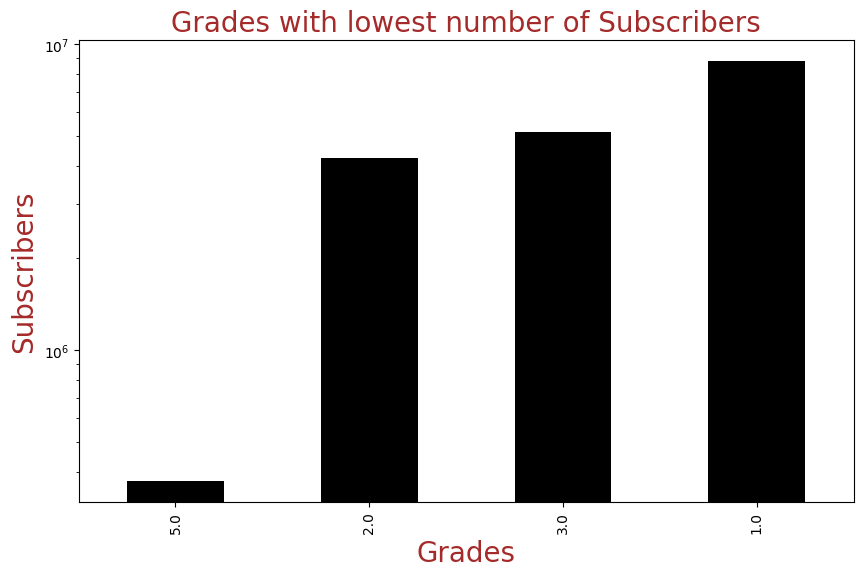

In [466]:
ax = grade.plot(kind='bar',color='black',logy=True,figsize=(10,6))
plt.xlabel('Grades',fontsize=20,color='brown')
plt.ylabel('Subscribers',fontsize=20,color='brown')
plt.title('Grades with lowest number of Subscribers',size=20,color='brown')
plt.show()

In [467]:
# Result: 5.0

In [468]:
#5 Find out the last 5 channels with minimum number of Subscribers

In [469]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'avg_subscription'],
      dtype='object')

In [470]:
last_S= data.sort_values(by='Subscribers').head()

In [471]:
last_S

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,avg_subscription
4096,4097.0,1.0,Xiaomi France,17.0,301.0,12943662.0,17.705882
92,93.0,3.0,hairong zheng,492.0,394.0,254252482.0,0.800813
3516,3517.0,1.0,Jianpeng Li,232.0,437.0,70635195.0,1.883621
3160,3161.0,1.0,Ron Funches - Topic,21.0,453.0,13932203.0,21.571429
2287,2288.0,1.0,Christian Nodal - Topic,30.0,471.0,17868274.0,15.700000


In [472]:
# Visualize

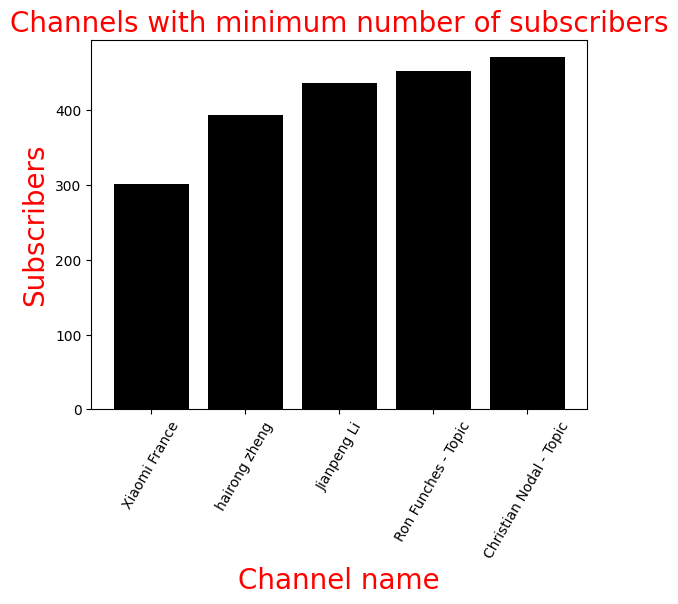

In [473]:
x = last_S['Channel name']
y = last_S['Subscribers']
plt.xlabel('Channel name',fontsize=20,color='red')
plt.ylabel('Subscribers',fontsize=20,color='red')
plt.title('Channels with minimum number of subscribers',size=20,color='red')
plt.bar(x,y,color='black')
plt.xticks(rotation=60)
plt.show()

In [474]:
#Result: Xiaomi France, hairong zheng, Jianpeng Li, Ron Funches - Topic, Ron Funches - Topic

In [475]:
#6 Which grade has the lowest Video Views

In [476]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'avg_subscription'],
      dtype='object')

In [477]:
grade_views = data.groupby('Grade')['Video views'].sum().sort_values()

In [478]:
grade_views

Grade
5.0    2.119909e+11
2.0    1.066137e+12
1.0    1.556398e+12
3.0    2.273949e+12
Name: Video views, dtype: float64

In [479]:
# Visualize

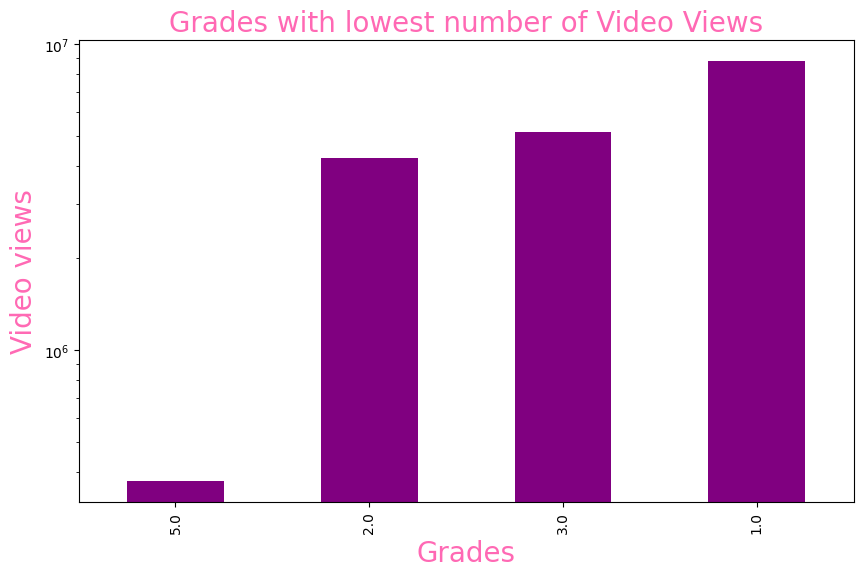

In [480]:
ax = grade.plot(kind='bar',color='purple',logy=True,figsize=(10,6))
plt.xlabel('Grades',fontsize=20,color='hotpink')
plt.ylabel('Video views',fontsize=20,color='hotpink')
plt.title('Grades with lowest number of Video Views',size=20,color='hotpink')
plt.show()

In [481]:
# Result: 5.0